In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales/advertising.csv


In [2]:
sales = pd.read_csv("/kaggle/input/sales/advertising.csv")

In [3]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
sales.shape

(200, 4)

In [6]:
sales.isnull().sum() # Checkiing of any null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: xlabel='TV'>

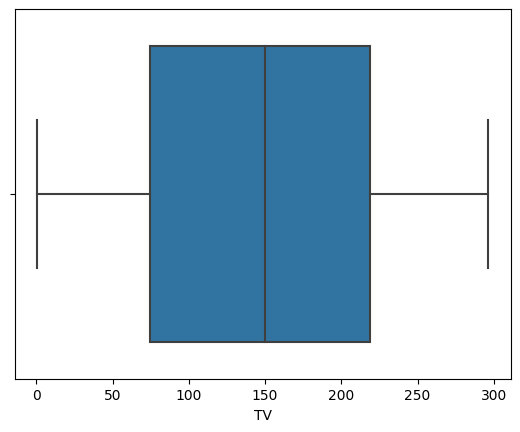

In [7]:
import seaborn as sns # Checking of any outliers
sns.boxplot(x = sales["TV"])

<Axes: xlabel='Newspaper'>

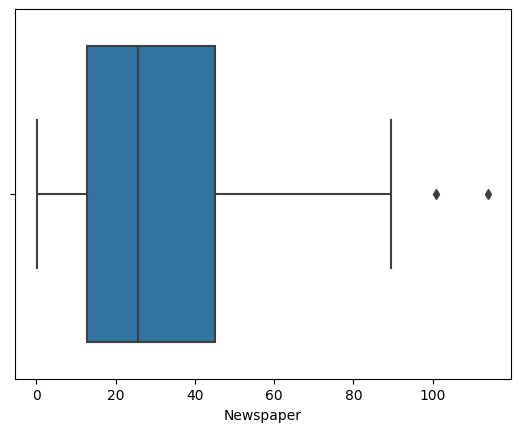

In [8]:
sns.boxplot(x = sales["Newspaper"])

<Axes: xlabel='Radio'>

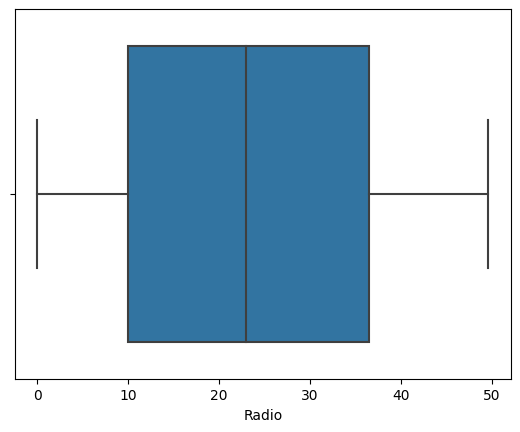

In [9]:
sns.boxplot(x = sales["Radio"])

<Axes: xlabel='Sales'>

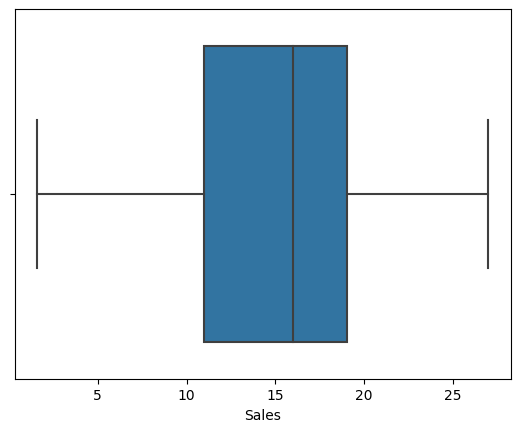

In [10]:
sns.boxplot(x = sales["Sales"])

### As we can see that there are not any outliers present.

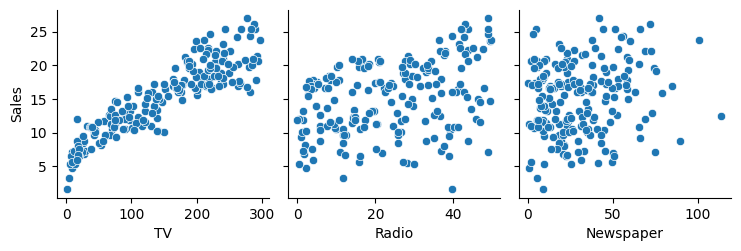

In [11]:
sns.pairplot(sales , x_vars = ['TV' , "Radio" , "Newspaper"], y_vars = "Sales" , kind = 'scatter')

In [12]:
sales.corr()["Sales"] # Here feature TV is highly correlated with sales

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
Name: Sales, dtype: float64

<Axes: >

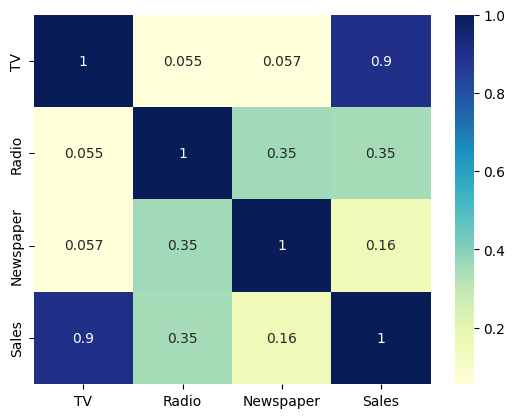

In [13]:
sns.heatmap(sales.corr(), cmap="YlGnBu", annot = True)

In [14]:
feature = sales.drop('Sales', axis=1)
target = sales["Sales"]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.3, random_state = 42)

## Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
y_pred = rfr.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error:", mse)

Mean Squared Error: 1.2933397529909412


## XGB Regressor

In [19]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(n_estimators=100, random_state=42)
xgbr.fit(X_train, y_train)

# Model Evaluation
y_pred2 = xgbr.predict(X_test)
mse =np.sqrt( mean_squared_error(y_test, y_pred2))
print("Mean Squared Error:", mse)

Mean Squared Error: 1.5820391731446084


## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Model Evaluation
y_pred3 = lr.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred3))
print("Mean Squared Error:", mse)

Mean Squared Error: 1.5942471691143587


## Visualization of the best model

In [21]:
visualization = pd.DataFrame({'Models':['rfr','xgbr','lr'],"MSR":[np.sqrt(mean_squared_error(y_test, y_pred)),
                                                               np.sqrt( mean_squared_error(y_test, y_pred2)), np.sqrt(mean_squared_error(y_test, y_pred3))]})

In [22]:
visualization

,Models,MSR
0,rfr,1.293340
1,xgbr,1.582039
2,lr,1.594247


<Axes: xlabel='Models', ylabel='MSR'>

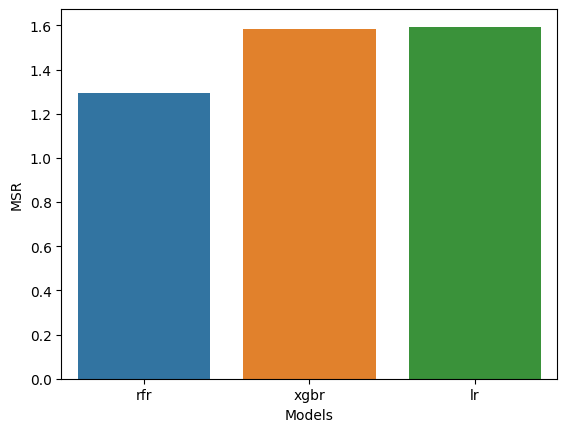

In [23]:
sns.barplot(x= visualization["Models"], y= visualization["MSR"])

## As we can see that in this graph the least Mean_Squared_Error is of RandomForestClassifier